<a href="https://colab.research.google.com/github/jangInw007/JENZY_Project/blob/main/JENZY_is_perfect_project_Basicpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd

# รวม Outcomes 2025-01 ถึง 2025-05

combined_outcomes_2025_all_months

In [22]:
import os
import pandas as pd

# กำหนดเส้นทางหลักของข้อมูล
base_path = '/content/drive/MyDrive/JENZY/Data'
all_outcomes_dfs = []

# วนซ้ำตั้งแต่เดือน 1 (ม.ค.) ถึง 5 (พ.ค.)
for month in range(1, 6):
    month_str = f'2025-{month:02d}'
    month_path = os.path.join(base_path, month_str)

    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            # ตรวจสอบว่าไฟล์เป็น outcomes.csv หรือไม่
            if 'outcomes.csv' in file:
                filepath = os.path.join(month_path, file)
                try:
                    df = pd.read_csv(filepath)

                    # 1. สร้างคอลัมน์ Police_Force จากชื่อไฟล์
                    file_parts = file.replace('-outcomes.csv', '').split('-')
                    police_force = '-'.join(file_parts[2:]).strip()
                    df['Police_Force'] = police_force

                    # 2. สร้างคอลัมน์ Month (รูปแบบ 01, 02, ... 05)
                    df['Month'] = f'{month:02d}'

                    # 3. เพิ่ม DataFrame เข้าในรายการ
                    all_outcomes_dfs.append(df)

                except Exception as e:
                    print(f"Error reading file: {filepath} : {e}")
    else:
        print(f"Directory not found: {month_path}")

if all_outcomes_dfs:
    # 4. รวม DataFrame ทั้งหมด
    combined_outcomes_2025_all_months = pd.concat(all_outcomes_dfs, ignore_index=True)

    # 5. [ขั้นตอนสำคัญ] ลบแถวที่ซ้ำซ้อนกันทั้งหมด
    # (ใช้ทุกคอลัมน์เพื่อยืนยันว่าคดีซ้ำกันจริง)
    rows_before_drop = len(combined_outcomes_2025_all_months)
    combined_outcomes_2025_all_months.drop_duplicates(inplace=True)
    rows_after_drop = len(combined_outcomes_2025_all_months)

    print("Combined and Cleaned Outcomes Data:")
    print(f"Total rows before de-duplication: {rows_before_drop}")
    print(f"Total rows dropped due to duplication: {rows_before_drop - rows_after_drop}")
    print(f"Total rows in final combined outcomes data: {rows_after_drop}")
    display(combined_outcomes_2025_all_months.tail(5))
else:
    print("No outcomes files found in the specified directories.")

Combined and Cleaned Outcomes Data:
Total rows before de-duplication: 794203
Total rows dropped due to duplication: 35660
Total rows in final combined outcomes data: 758543


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force
794198,556b7983b7a8b71cc1f3b7bc3578539103fd0fc17347a8...,05,Suffolk Constabulary,Suffolk Constabulary,1.198680,52.050820,On or near Chaplains Gardens,E01029966,Ipswich 009D,Unable to prosecute suspect,suffolk
794199,ba4d5e5b9b9423f22f0bc1dab59ab4bebad54a657dc1d4...,05,Suffolk Constabulary,Suffolk Constabulary,1.318513,52.092376,On or near Doric Place,E01030211,East Suffolk 022D,Unable to prosecute suspect,suffolk
794200,ea4767117c9ce66fe45bad721a9c7ba34073f780163235...,05,Suffolk Constabulary,Suffolk Constabulary,1.483242,52.216987,On or near Saxon Road,E01030210,East Suffolk 018D,Unable to prosecute suspect,suffolk
794201,0f2d597755bae68bd9b9d36e2a2af04b2941510d87254a...,05,Suffolk Constabulary,Suffolk Constabulary,1.327349,52.100626,On or near Deben Meadows,E01030194,East Suffolk 020B,Action to be taken by another organisation,suffolk
794202,8a100dda3bd72723167cc2097200f4debd6c17fa40dd22...,05,Suffolk Constabulary,Suffolk Constabulary,0.731994,52.049756,On or near Hillcrest Road,E01029916,Babergh 007E,Unable to prosecute suspect,suffolk


# Clean Data

## Outcomes

In [23]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,11315
Latitude,11315
Location,0
LSOA code,11317
LSOA name,11317
Outcome type,0


### 1. เติม Dummy - LSOA Missing

In [24]:
# แทนที่ค่าว่างใน LSOA ด้วยข้อความระบุว่าข้อมูลขาดหายไป
imputation_value = 'LSOA Missing'

combined_outcomes_2025_all_months['LSOA code'].fillna(imputation_value, inplace=True)
combined_outcomes_2025_all_months['LSOA name'].fillna(imputation_value, inplace=True)

/tmp/ipython-input-287462184.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_outcomes_2025_all_months['LSOA code'].fillna(imputation_value, inplace=True)
/tmp/ipython-input-287462184.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [25]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,11315
Latitude,11315
Location,0
LSOA code,0
LSOA name,0
Outcome type,0


### สร้าง Column เพื่อระบุว่าแถวใดถูกเติมค่า

ถ้า Longitude เป็น NaN → ธงจะเป็น True (หมายความว่าแถวนี้จะถูกเติมค่าในขั้นตอนต่อไป)

ถ้า Longitude มีค่า → ธงจะเป็น False (หมายความว่าเป็นพิกัดจริง)

In [27]:
# 2. สร้าง Flag Column เพื่อระบุว่าแถวใดถูกเติมค่า
combined_outcomes_2025_all_months['Is_LonLat_Imputed'] = combined_outcomes_2025_all_months['Longitude'].isnull()
combined_outcomes_2025_all_months.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed
0,36c74d0ef277fc0a1199c04a701c5a778079d7e1f39def...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.187811,51.703486,On or near Well Hill,E01022384,Stroud 010D,Investigation complete; no suspect identified,gloucestershire,False
1,76048dcfc086c0251da35b492a5312abe77ba9a4254316...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No location,LSOA Missing,LSOA Missing,Unable to prosecute suspect,gloucestershire,True
2,d6a8e93f57127b6d424fb61b7cf263442e7c9ba3119eec...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No location,LSOA Missing,LSOA Missing,Investigation complete; no suspect identified,gloucestershire,True
3,2df4827fcd024db83c38932b977dd1f430a86cc3b76c36...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No location,LSOA Missing,LSOA Missing,Local resolution,gloucestershire,True
4,bacebcd65948542f6f6a2a292a8b8e8e6dd431f94a617c...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.080914,51.896367,On or near A4015,E01022126,Cheltenham 009F,Investigation complete; no suspect identified,gloucestershire,False


### คำนวณค่ามัธยฐานของ Longitude/Latitude สำหรับแต่ละ Police_Force

In [28]:
# 1. คำนวณค่ามัธยฐานของ Longitude/Latitude สำหรับแต่ละ Police_Force
force_coords_median = combined_outcomes_2025_all_months.groupby('Police_Force')[['Longitude', 'Latitude']].median()

# 2. เติมค่าว่างที่เหลือด้วยค่ามัธยฐานของ Police Force
combined_outcomes_2025_all_months['Longitude'].fillna(
    combined_outcomes_2025_all_months['Police_Force'].map(force_coords_median['Longitude']),
    inplace=True
)
combined_outcomes_2025_all_months['Latitude'].fillna(
    combined_outcomes_2025_all_months['Police_Force'].map(force_coords_median['Latitude']),
    inplace=True
)

/tmp/ipython-input-1755549259.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_outcomes_2025_all_months['Longitude'].fillna(
/tmp/ipython-input-1755549259.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [29]:
combined_outcomes_2025_all_months

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed
0,36c74d0ef277fc0a1199c04a701c5a778079d7e1f39def...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.187811,51.703486,On or near Well Hill,E01022384,Stroud 010D,Investigation complete; no suspect identified,gloucestershire,False
1,76048dcfc086c0251da35b492a5312abe77ba9a4254316...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Unable to prosecute suspect,gloucestershire,True
2,d6a8e93f57127b6d424fb61b7cf263442e7c9ba3119eec...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Investigation complete; no suspect identified,gloucestershire,True
3,2df4827fcd024db83c38932b977dd1f430a86cc3b76c36...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Local resolution,gloucestershire,True
4,bacebcd65948542f6f6a2a292a8b8e8e6dd431f94a617c...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.080914,51.896367,On or near A4015,E01022126,Cheltenham 009F,Investigation complete; no suspect identified,gloucestershire,False
...,...,...,...,...,...,...,...,...,...,...,...,...
794198,556b7983b7a8b71cc1f3b7bc3578539103fd0fc17347a8...,05,Suffolk Constabulary,Suffolk Constabulary,1.198680,52.050820,On or near Chaplains Gardens,E01029966,Ipswich 009D,Unable to prosecute suspect,suffolk,False
794199,ba4d5e5b9b9423f22f0bc1dab59ab4bebad54a657dc1d4...,05,Suffolk Constabulary,Suffolk Constabulary,1.318513,52.092376,On or near Doric Place,E01030211,East Suffolk 022D,Unable to prosecute suspect,suffolk,False
794200,ea4767117c9ce66fe45bad721a9c7ba34073f780163235...,05,Suffolk Constabulary,Suffolk Constabulary,1.483242,52.216987,On or near Saxon Road,E01030210,East Suffolk 018D,Unable to prosecute suspect,suffolk,False
794201,0f2d597755bae68bd9b9d36e2a2af04b2941510d87254a...,05,Suffolk Constabulary,Suffolk Constabulary,1.327349,52.100626,On or near Deben Meadows,E01030194,East Suffolk 020B,Action to be taken by another organisation,suffolk,False


In [30]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,0
LSOA name,0
Outcome type,0


# คำถาม อย่างต่ำคนละ 2 คำถาม

##Outcomes

### 1.เกิด Outcomes Type เท่าไหร่และคิดเป็นกี่เปอร์เซ็นต์ เรียง Top 5

In [44]:
# 1. คำนวณจำนวนและสัดส่วนของแต่ละ Outcome type ในภาพรวม
total_outcomes_breakdown = combined_outcomes_2025_all_months.groupby('Outcome type').size().reset_index(name='Total_Count')
total_outcomes_breakdown['Overall_Proportion'] = (
    total_outcomes_breakdown['Total_Count'] / total_outcomes_breakdown['Total_Count'].sum()
) * 100 # แปลงเป็นเปอร์เซ็นต์

print("Overall Ranking of Outcome Types Across All Police Forces:")
# จัดเรียงตามจำนวนมากไปน้อยและแสดงผล
display(total_outcomes_breakdown.sort_values(by='Total_Count', ascending=False).round(2).astype(str))

Overall Ranking of Outcome Types Across All Police Forces:


,Outcome type,Total_Count,Overall_Proportion
11,Unable to prosecute suspect,332509,43.84
4,Investigation complete; no suspect identified,288727,38.06
9,Suspect charged,75012,9.89
5,Local resolution,25650,3.38
0,Action to be taken by another organisation,13107,1.73
6,Offender given a caution,7317,0.96
3,Further investigation is not in the public int...,6445,0.85
1,Formal action is not in the public interest,4451,0.59
2,Further action is not in the public interest,3756,0.5
10,Suspect charged as part of another case,837,0.11


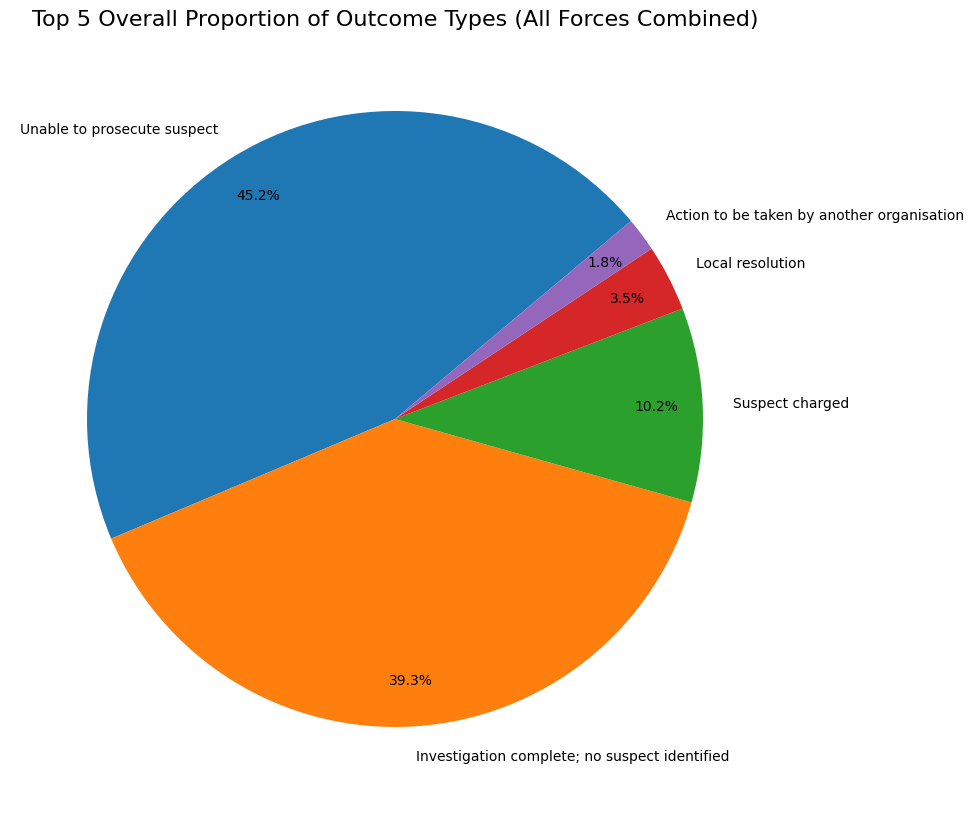

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_10_outcomes = total_outcomes_breakdown.nlargest(5, 'Total_Count')
plt.figure(figsize=(10, 10))
plt.pie(
    top_10_outcomes['Overall_Proportion'],
    labels=top_10_outcomes['Outcome type'],
    autopct='%1.1f%%', # แสดงผลเป็นเปอร์เซ็นต์
    startangle=40,
    pctdistance=0.85 # ระยะห่างของข้อความเปอร์เซ็นต์จากศูนย์กลาง
)
plt.title('Top 5 Overall Proportion of Outcome Types (All Forces Combined)', fontsize=16)
plt.show()

### ผลลัพธ์คดี (Outcome type) ส่วนใหญ่คืออะไร?

### เมืองไหนจับคนร้ายเก่งสุด? (Suspect Charged)

Top 5 Police Forces by Proportion of 'Suspect charged' Outcomes:


,Police_Force,Proportion
246,norfolk%,0.19%
282,northumbria%,0.19%
266,north-yorkshire%,0.19%
195,lancashire%,0.18%
67,cumbria%,0.17%


/tmp/ipython-input-252040799.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




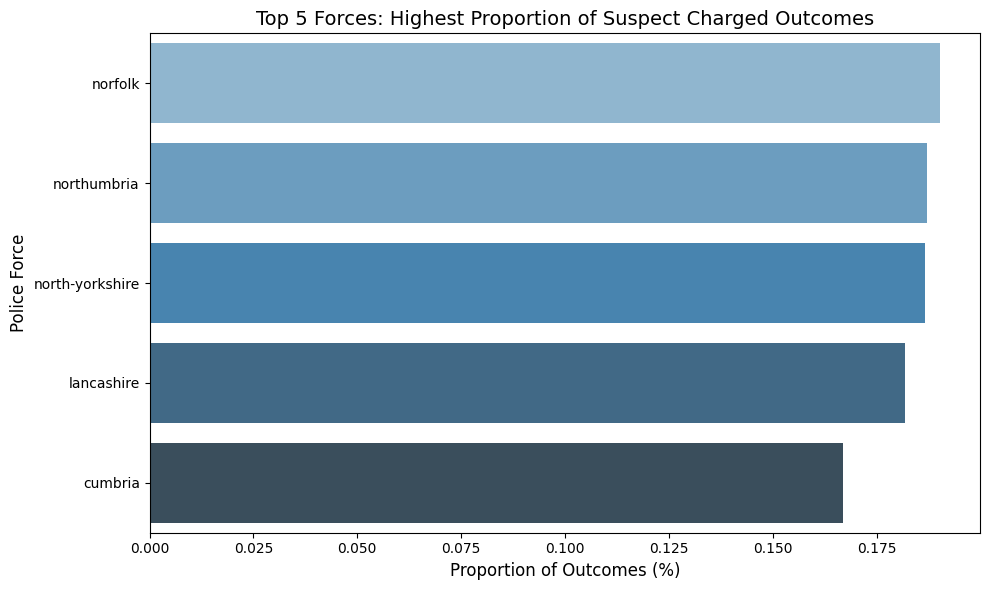

In [ ]:
# ต้องรันโค้ด A จากคำตอบก่อนหน้าเพื่อให้ได้ outcome_analysis_df ก่อน
# ... (สมมติว่า outcome_analysis_df ถูกสร้างขึ้นแล้ว)

# 1. กรองเฉพาะ 'Suspect charged' และจัดอันดับ
charged_analysis = outcome_analysis_df[
    outcome_analysis_df['Outcome type'] == 'Suspect charged'
].sort_values(by='Proportion', ascending=False).head(5)

print("Top 5 Police Forces by Proportion of 'Suspect charged' Outcomes:")
display(charged_analysis[['Police_Force', 'Proportion']].round(2).astype(str) + '%')

# 2. โค้ดนำเสนอ: Horizontal Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Proportion',
    y='Police_Force',
    data=charged_analysis,
    palette='Blues_d'
)
plt.title('Top 5 Forces: Highest Proportion of Suspect Charged Outcomes', fontsize=14)
plt.xlabel('Proportion of Outcomes (%)', fontsize=12)
plt.ylabel('Police Force', fontsize=12)
plt.tight_layout()
plt.show()

### การตั้งข้อหาน้อยลงไหม?

# อ่าน Excel

In [2]:
import pandas as pd

In [3]:
import pandas as pd

# กำหนดเส้นทางของไฟล์ Excel
filepath = '/content/drive/MyDrive/JENZY/Data/outcomes.xlsx'

try:
    # ใช้ pd.read_excel เพื่ออ่านไฟล์
    # โดยทั่วไป ถ้าไฟล์มีชีทเดียว จะโหลดชีทแรกโดยอัตโนมัติ
    df = pd.read_excel(filepath)

    print(f"อ่านไฟล์สำเร็จ: {filepath}")
    print(f"จำนวนแถวใน DataFrame: {len(df)}")
    print("\nแสดง 5 แถวแรกของข้อมูล:")
    display(df.head())

except FileNotFoundError:
    print(f"*** ERROR: ไม่พบไฟล์ที่เส้นทาง: {filepath} ***")
except Exception as e:
    print(f"*** ERROR: เกิดข้อผิดพลาดในการอ่านไฟล์: {e} ***")

# หากไฟล์มีหลายชีท และคุณต้องการระบุชีท:
# outcomes_excel_df = pd.read_excel(filepath, sheet_name='ชื่อชีทที่ต้องการ')

อ่านไฟล์สำเร็จ: /content/drive/MyDrive/JENZY/Data/outcomes.xlsx
จำนวนแถวใน DataFrame: 758543

แสดง 5 แถวแรกของข้อมูล:


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed
0,36c74d0ef277fc0a1199c04a701c5a778079d7e1f39def...,1,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.187811,51.703486,On or near Well Hill,E01022384,Stroud 010D,Investigation complete; no suspect identified,gloucestershire,False
1,76048dcfc086c0251da35b492a5312abe77ba9a4254316...,1,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Unable to prosecute suspect,gloucestershire,True
2,d6a8e93f57127b6d424fb61b7cf263442e7c9ba3119eec...,1,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Investigation complete; no suspect identified,gloucestershire,True
3,2df4827fcd024db83c38932b977dd1f430a86cc3b76c36...,1,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Local resolution,gloucestershire,True
4,bacebcd65948542f6f6a2a292a8b8e8e6dd431f94a617c...,1,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.080914,51.896367,On or near A4015,E01022126,Cheltenham 009F,Investigation complete; no suspect identified,gloucestershire,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758543 entries, 0 to 758542
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Crime ID           758543 non-null  object 
 1   Month              758543 non-null  int64  
 2   Reported by        758543 non-null  object 
 3   Falls within       758543 non-null  object 
 4   Longitude          758543 non-null  float64
 5   Latitude           758543 non-null  float64
 6   Location           758543 non-null  object 
 7   LSOA code          758543 non-null  object 
 8   LSOA name          758543 non-null  object 
 9   Outcome type       758543 non-null  object 
 10  Police_Force       758543 non-null  object 
 11  Is_LonLat_Imputed  758543 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 64.4+ MB


In [ ]:
df['Falls within'].unique()

array(['Gloucestershire Constabulary', 'Northamptonshire Police',
       'Northumbria Police', 'Cheshire Constabulary',
       'South Wales Police', 'Cleveland Police', 'Cumbria Constabulary',
       'West Mercia Police', 'Lancashire Constabulary',
       'City of London Police', 'Wiltshire Police', 'Lincolnshire Police',
       'Cambridgeshire Constabulary', 'Essex Police',
       'Warwickshire Police', 'Derbyshire Constabulary',
       'Merseyside Police', 'Metropolitan Police Service',
       'Sussex Police', 'Avon and Somerset Constabulary',
       'Leicestershire Police', 'Norfolk Constabulary',
       'South Yorkshire Police', 'Kent Police', 'Surrey Police',
       'Gwent Police', 'Nottinghamshire Police', 'Bedfordshire Police',
       'Dyfed-Powys Police', 'Hampshire Constabulary',
       'Suffolk Constabulary', 'Durham Constabulary',
       'Staffordshire Police', 'Dorset Police', 'Humberside Police',
       'West Midlands Police', 'North Wales Police',
       'Thames Valley Po

In [ ]:
# เช็คว่าค่าในคอลัมน์ 'Reported by' และ 'Falls within' เหมือนกันในแต่ละแถวหรือไม่
are_columns_equal = df['Reported by'] == df['Falls within']

# ตรวจสอบว่าทุกแถวมีค่าเหมือนกันหรือไม่
all_rows_equal = are_columns_equal.all()

if all_rows_equal:
    print("ค่าในคอลัมน์ 'Reported by' และ 'Falls within' เหมือนกันทุกแถว")
else:
    print("ค่าในคอลัมน์ 'Reported by' และ 'Falls within' ไม่เหมือนกันในบางแถว")

# ถ้าต้องการดูว่าแถวไหนบ้างที่ไม่เหมือนกัน:
# rows_not_equal = df[~are_columns_equal]
# print("\nแถวที่ค่าในคอลัมน์ 'Reported by' และ 'Falls within' ไม่เหมือนกัน:")
# display(rows_not_equal)

ค่าในคอลัมน์ 'Reported by' และ 'Falls within' เหมือนกันทุกแถว


In [ ]:
df['Outcome type'].unique()

array(['Investigation complete; no suspect identified',
       'Unable to prosecute suspect', 'Local resolution',
       'Suspect charged', 'Action to be taken by another organisation',
       'Suspect charged as part of another case',
       'Formal action is not in the public interest',
       'Offender given a caution',
       'Further action is not in the public interest',
       'Further investigation is not in the public interest',
       'Offender given a drugs possession warning',
       'Offender given penalty notice'], dtype=object)

In [7]:
import pandas as pd

# กำหนดเส้นทางของไฟล์ Excel
filepath = '/content/drive/MyDrive/JENZY/Data/street.xlsx'
df_street = pd.read_excel(filepath)
df_street.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Police_Force
0,5b3b243f3ae69b761588f65caefe62454587b15576ed55...,1,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-1.084621,53.251666,On or near Limetree Avenue,E01033769,Bassetlaw 014F,Violence and sexual offences,Action to be taken by another organisation,avon-and-somerset
1,1673f50aa688f77cc735d07f47a4f8fcff38d5ebcb70ed...,1,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511824,51.411782,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Under investigation,avon-and-somerset
2,cf50d7824b02ca548125204807e34491d14de60b1812e7...,1,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.508867,51.416147,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Local resolution,avon-and-somerset
3,63e97874e46f7c886d2d9444741fa4651dac32af835e80...,1,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.508867,51.416147,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,avon-and-somerset
4,7d93e2987187429aee7de3cc7d1042f7fe47086821296f...,1,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.508867,51.416147,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,avon-and-somerset
